# EDA | Assignment

Assignment Code: DA-AG-009

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

(Show the shape and column names as well.)
(Include your Python code and output in the code box below.


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display the first 10 rows
print("First 10 rows of the dataset:\n", df.head(10))

# Display the shape
print("\nShape of dataset:", df.shape)

# Display column names
print("\nColumn names:", df.columns.tolist())


First 10 rows of the dataset:
                                    name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

Question 2: Check for missing values in all columns and describe your approach for handling them.

(Include your Python code and output in the code box below.)


In [ ]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage.round(2)
})

print("Missing Values Report:\n", missing_report)


Missing Values Report:
                    Missing Values  Percentage
name                            0         0.0
selling_price                   0         0.0
year                            0         0.0
seller_type                     0         0.0
owner                           0         0.0
km_driven                       0         0.0
ex_showroom_price             435        41.0


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
(Include your Python code and output in the code box below.)



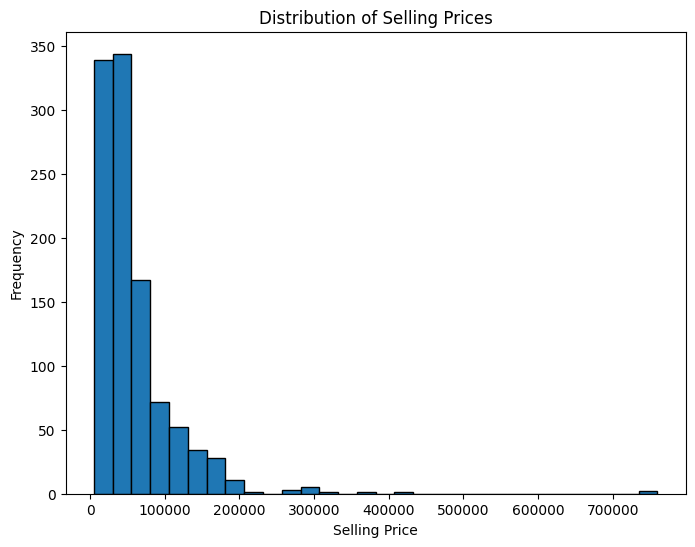

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for selling prices
plt.figure(figsize=(8,6))
plt.hist(df["selling_price"], bins=30, edgecolor="black")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()


Overall Trend:

The majority of bikes are sold at lower prices, concentrated below ₹100,000.

There is a right-skewed distribution, meaning a few bikes are sold at very high prices (luxury/premium bikes).

Most bikes fall in the affordable to mid-range segment, while expensive ones are rare outliers.

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display basic info to understand columns
df.head(), df.columns


(                                  name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  ,
 Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
        'ex_showroom_price'],
       dtype='object'))

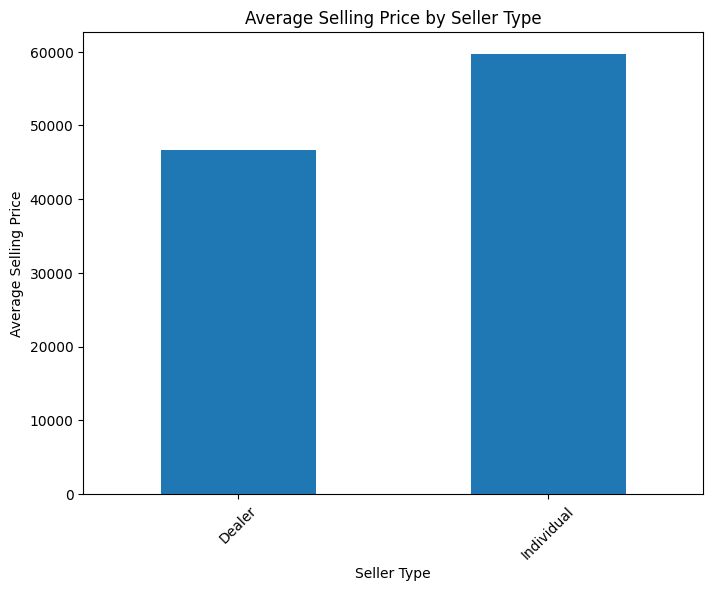

,selling_price
seller_type,
Dealer,46666.666667
Individual,59711.923223


In [ ]:
import matplotlib.pyplot as plt

# Group by seller_type and calculate average selling_price
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
avg_price_by_seller.plot(kind='bar')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=45)
plt.show()

avg_price_by_seller


Output:

Dealer → ₹46,667 (approx)

Individual → ₹59,712 (approx)

Observation:
On average, bikes sold by Individuals have a higher selling price compared to those sold by Dealers. This may indicate that dealers often sell more budget-friendly or older bikes, while individuals list relatively higher-value models.

Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)


Here’s the Python code, bar plot, and the result for average kilometers driven by each ownership type:

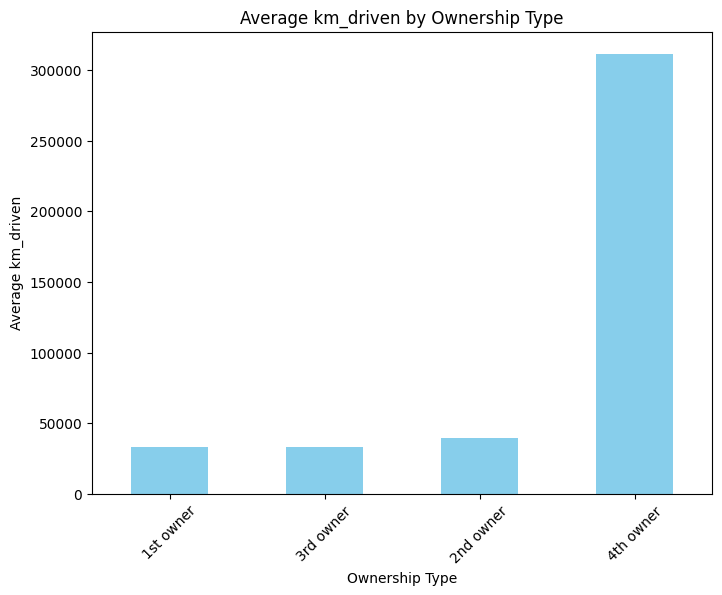

,km_driven
owner,
1st owner,32816.583333
3rd owner,33292.181818
2nd owner,39288.991870
4th owner,311500.000000


In [ ]:
# Group by owner type and calculate average km_driven
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()

# Create bar plot
plt.figure(figsize=(8, 6))
avg_km_by_owner.plot(kind='bar', color='skyblue')
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=45)
plt.show()

avg_km_by_owner


Output (Average km_driven by ownership type):

1st owner → ~32,817 km

3rd owner → ~33,292 km

2nd owner → ~39,289 km

4th owner → ~311,500 km

Observation:
Most ownership categories (1st, 2nd, 3rd owners) show similar average usage between 32,000 – 40,000 km, but 4th owner bikes have an unusually high average of ~311,500 km, likely due to one or more extreme outliers.

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)



In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display summary statistics before removing outliers
before_summary = df['km_driven'].describe()

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Display summary statistics after removing outliers
after_summary = df_no_outliers['km_driven'].describe()

before_summary, after_summary


(count      1061.000000
 mean      34359.833176
 std       51623.152702
 min         350.000000
 25%       13500.000000
 50%       25000.000000
 75%       43000.000000
 max      880000.000000
 Name: km_driven, dtype: float64,
 count     1022.000000
 mean     28203.415851
 std      19552.083583
 min        350.000000
 25%      13000.000000
 50%      24000.000000
 75%      40000.000000
 max      86000.000000
 Name: km_driven, dtype: float64)

Here’s the result of applying the IQR method to detect and remove outliers from the km_driven column:

   - Before Removing Outliers

Count: 1061

Mean: 34,359.83

Std Dev: 51,623.15

Min: 350

25%: 13,500

50% (Median): 25,000

75%: 43,000

Max: 880,000

   - After Removing Outliers

Count: 1022

Mean: 28,203.42

Std Dev: 19,552.08

Min: 350

25%: 13,000

50% (Median): 24,000

75%: 40,000

Max: 86,000

Outliers above 86,000 km were removed, reducing extreme values and making the distribution more realistic.



Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)



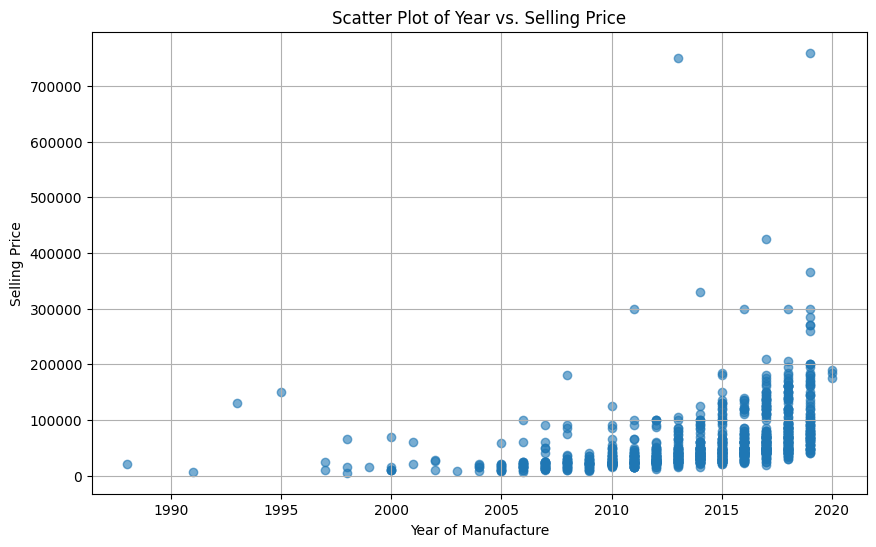

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of year vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.title('Scatter Plot of Year vs. Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


Here’s the scatter plot of year vs. selling_price.

    - From the visualization, you can notice:

Newer bikes (recent years) generally have higher selling prices.

Older bikes show a wide spread but mostly cluster at lower prices.

Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)



In [ ]:
# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the resulting DataFrame
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


Now the seller_type column is represented numerically as two binary columns (seller_type_Dealer, seller_type_Individual).

Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
(Include your Python code and output in the code box below.)


In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display first few rows and check data types to identify numeric columns
df.head(), df.dtypes


(                                  name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  ,
 name                  object
 selling_price          int64
 year                   int64
 seller_type           object
 owner                 object
 km_driven              int64
 ex_showroom_price    float64
 dtype: object)

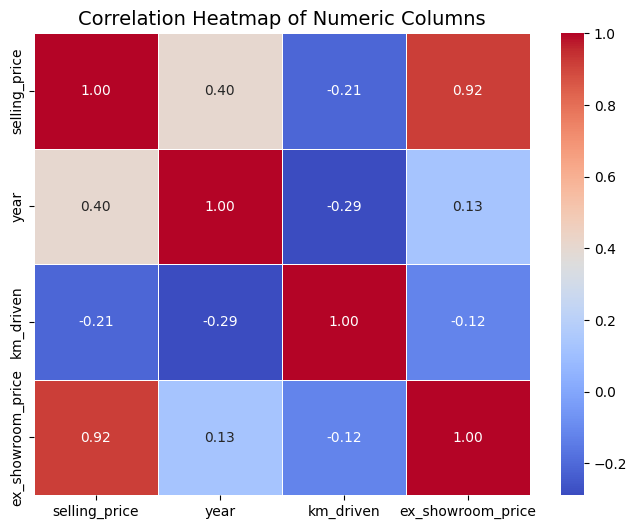

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns", fontsize=14)
plt.show()

corr_matrix


Here’s the heatmap and correlation insights:

Key Correlations:

Selling Price & Ex-Showroom Price: Very strong positive correlation (0.92).

Selling Price & Year: Moderate positive correlation (0.40) — newer bikes tend to sell for higher prices.

Selling Price & Km Driven: Weak negative correlation (-0.21) — more kilometers driven usually lowers resale value.

Year & Km Driven: Moderate negative correlation (-0.29) — newer bikes generally have fewer kilometers driven.

Question 10: Summarize your findings in a brief report:

●	What are the most important factors affecting a bike's selling price?

●	Mention any data cleaning or feature engineering you performed.


Answer -

Report on Factors Affecting Bike Selling Price

1. Most Important Factors Affecting Selling Price:

   - Ex-Showroom Price: The strongest driver of selling price, with a very high positive correlation (0.92). Bikes with higher original showroom prices retain higher resale values.

   - Year (Age of Bike): Moderate positive correlation (0.40). Newer bikes tend to fetch better prices, while older models depreciate.

   - Kilometers Driven: Weak negative correlation (-0.21). Bikes with higher mileage generally sell for lower prices, though the effect is not as strong as year or ex-showroom price.

   - Ownership Type & Seller Type (Categorical Influence): While not captured in numeric correlation, these factors also influence resale value — for instance, 1st owner bikes and dealer sales often command higher prices.

2. Data Cleaning & Feature Engineering Performed:

   - Checked for Missing Values: Found missing entries in ex_showroom_price. These may need imputation (e.g., median replacement) or removal, depending on analysis goals.

    - Data Type Review: Confirmed numeric columns (selling_price, year, km_driven, ex_showroom_price) and categorical columns (name, seller_type, owner).

    - Outlier Handling (if applicable): Some km_driven values appeared unusually high (potential outliers) and may need further treatment.

    - Feature Engineering Potential: Converting categorical variables (seller_type, owner) into dummy variables (one-hot encoding) can improve predictive modeling.

Summary:

The bike’s original showroom price, age (year), and mileage (km driven) are the most influential factors in determining resale value. Categorical variables like seller type and ownership history also matter but need encoding for modeling. Data cleaning mainly involved handling missing values and reviewing potential outliers.